In [67]:
%matplotlib inline
%pylab inline
# %load_ext memory_profiler
import matplotlib.pyplot as plt
import seaborn; seaborn.set_style('whitegrid')
import numpy
import itertools

from pomegranate import *
from pomegranate import BayesianNetwork
import iacO

Populating the interactive namespace from numpy and matplotlib


In [68]:
def prob(evidences, atts):
    count, total = 0, 0
    for datapoint in iacO.data:
        inc = True
        for key in evidences:
            inc = inc and datapoint[key] == evidences[key]
        if inc:
            total += 1
            f = True
            for key in atts:
                f = f and datapoint[key] == atts[key]
            if f:
                count += 1
    return count, total, float(count)/total

def enums(key):
    vals = set()
    for datapoint in iacO.data:
        if datapoint[key] not in vals:
            vals.add(datapoint[key])
    return list(vals)

In [74]:
print(prob({'gang': 'Jets', 'occ': 'pusher'},{'mar': 'single'}))
print(prob({},{'gang': 'Jets'}))
print(prob({},{'name': 'John'}))
print(len(iacO.data))
print(enums("name"))

(4, 5, 0.8)
(15, 27, 0.5555555555555556)
(1, 27, 0.037037037037037035)
27
['Pete', 'Ned', 'Jim', 'Ralph', 'Nick', 'Clyde', 'Rick', 'John', 'Lance', 'Ken', 'Mike', 'Fred', 'Dave', 'Ike', 'Earl', 'Ol', 'Don', 'Phil', 'Neal', 'Greg', 'Gene', 'Art', 'Sam', 'Al', 'Doug', 'George', 'Karl']


In [104]:
# attributes = ["gang", "age", "edu", "mar", "occ"]
attributes = ["gang", "age", "edu", "mar", "occ", "name"]
distributions = {}
for att in attributes:
    probs = {}
    vals = enums(att)
    for val in vals:
        probs[val] = prob({},{att:val})[2]
    distributions[att] = DiscreteDistribution(probs)

dataInArray = []
n = {}
for datapoint in iacO.data:
    row = []
    for att in attributes:
        row.append(datapoint[att])
#     row.append(datapoint["name"])
    dataInArray.append(row)
#     n[tuple(row)] = datapoint["name"]
print(len(dataInArray),dataInArray)

(27, [['Jets', '40s', 'JH', 'single', 'pusher', 'Art'], ['Jets', '30s', 'JH', 'married', 'burglar', 'Al'], ['Jets', '20s', 'COL', 'single', 'bookie', 'Sam'], ['Jets', '40s', 'JH', 'single', 'bookie', 'Clyde'], ['Jets', '30s', 'JH', 'single', 'bookie', 'Mike'], ['Jets', '20s', 'JH', 'divorced', 'burglar', 'Jim'], ['Jets', '20s', 'HS', 'married', 'pusher', 'Greg'], ['Jets', '20s', 'JH', 'married', 'burglar', 'John'], ['Jets', '30s', 'HS', 'single', 'bookie', 'Doug'], ['Jets', '20s', 'JS', 'married', 'burglar', 'Lance'], ['Jets', '20s', 'JH', 'divorced', 'burglar', 'George'], ['Jets', '20s', 'HS', 'single', 'bookie', 'Pete'], ['Jets', '20s', 'HS', 'single', 'pusher', 'Fred'], ['Jets', '20s', 'COL', 'single', 'pusher', 'Gene'], ['Jets', '30s', 'JH', 'single', 'pusher', 'Ralph'], ['Sharks', '30s', 'COL', 'married', 'pusher', 'Phil'], ['Sharks', '30s', 'JH', 'single', 'bookie', 'Ike'], ['Sharks', '30s', 'HS', 'single', 'pusher', 'Nick'], ['Sharks', '30s', 'COL', 'married', 'burglar', 'Don'],

((), (0,), (), (), (), ())


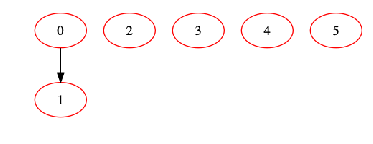

In [105]:
modelFromData = BayesianNetwork.from_samples(dataInArray, algorithm='exact')
print modelFromData.structure
modelFromData.plot()

In [106]:
src = []
dist = []
states = []
for att in attributes:
    src.append(enums(att))
    dist.append(distributions[att])
CPT = []
c = 0
for element in itertools.product(*src):
    temp = list(element)
    if temp in dataInArray:
        CPT.append(temp+[1])
        c += 1
    else:
        CPT.append(temp+[0])
print(c,CPT)

(27, [['Jets', '20s', 'HS', 'single', 'bookie', 'Pete', 1], ['Jets', '20s', 'HS', 'single', 'bookie', 'Ned', 0], ['Jets', '20s', 'HS', 'single', 'bookie', 'Jim', 0], ['Jets', '20s', 'HS', 'single', 'bookie', 'Ralph', 0], ['Jets', '20s', 'HS', 'single', 'bookie', 'Nick', 0], ['Jets', '20s', 'HS', 'single', 'bookie', 'Clyde', 0], ['Jets', '20s', 'HS', 'single', 'bookie', 'Rick', 0], ['Jets', '20s', 'HS', 'single', 'bookie', 'John', 0], ['Jets', '20s', 'HS', 'single', 'bookie', 'Lance', 0], ['Jets', '20s', 'HS', 'single', 'bookie', 'Ken', 0], ['Jets', '20s', 'HS', 'single', 'bookie', 'Mike', 0], ['Jets', '20s', 'HS', 'single', 'bookie', 'Fred', 0], ['Jets', '20s', 'HS', 'single', 'bookie', 'Dave', 0], ['Jets', '20s', 'HS', 'single', 'bookie', 'Ike', 0], ['Jets', '20s', 'HS', 'single', 'bookie', 'Earl', 0], ['Jets', '20s', 'HS', 'single', 'bookie', 'Ol', 0], ['Jets', '20s', 'HS', 'single', 'bookie', 'Don', 0], ['Jets', '20s', 'HS', 'single', 'bookie', 'Phil', 0], ['Jets', '20s', 'HS', 'sin

In [112]:
cond = ConditionalProbabilityTable(CPT, dist[:-1])
name = State(cond, name="name")
gang = State(distributions["gang"], name="gang")
age = State(distributions["age"], name="age")
edu = State(distributions["edu"], name="edu")
mar = State(distributions["mar"], name="mar")
occ = State(distributions["occ"], name="occ")

model = BayesianNetwork("Jets and Sharks")
model.add_states(gang, age, edu, mar, occ, name)

model.add_edge(gang, name)
model.add_edge(age, name)
model.add_edge(edu, name)
model.add_edge(mar, name)
model.add_edge(occ, name)
model.bake()
# print(model.predict_proba({}))

In [122]:
# print(prob({'gang': 'Jets', 'occ': 'pusher'},{'mar': 'single'}))
# print(model.predict_proba({'gang': 'Jets', 'occ': 'pusher'}))
# print(prob({'name': 'Lance', 'occ': 'pusher'},{'mar': 'single'}))
# print(model.predict_proba({'name': 'Lance', 'occ': 'pusher'}))
# print(model.predict_proba({'gang': 'Sharks', 'age': '20s'}))
print(model.predict_proba({'gang': 'Jets'}))
# print(prob({},{'gang': 'Jets'}))
# print(prob({},{'name': 'John'}))

['Jets'
 {
    "frozen" :false,
    "dtype" :"str",
    "class" :"Distribution",
    "parameters" :[
        {
            "20s" :0.5081771601038815,
            "30s" :0.42612479820313043,
            "40s" :0.06569804169298818
        }
    ],
    "name" :"DiscreteDistribution"
}
 {
    "frozen" :false,
    "dtype" :"str",
    "class" :"Distribution",
    "parameters" :[
        {
            "HS" :0.4084368639011721,
            "JH" :0.47504737839545147,
            "COL" :0.10949673615498019,
            "JS" :0.00701902154839625
        }
    ],
    "name" :"DiscreteDistribution"
}
 {
    "frozen" :false,
    "dtype" :"str",
    "class" :"Distribution",
    "parameters" :[
        {
            "single" :0.7199410402189932,
            "married" :0.22952200463255432,
            "divorced" :0.05053695514845243
        }
    ],
    "name" :"DiscreteDistribution"
}
 {
    "frozen" :false,
    "dtype" :"str",
    "class" :"Distribution",
    "parameters" :[
        {
            "pu